# Predicting heart disease using machine learning

This notebook looks into using various Python-based machaine learning and data science libariers in an attempt
to build a machine learning model capable of predicting whether or not someone has heart disease based on their
medical attributes.

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not the have heart 
disease?

## 2. Data

The original data came from Cleavland data from UCI Machine Learning Repsitory.
https://archive.ics.uci.edu/dataset/45/heart+disease
    
There is also a version of it available on Kaggle.
https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease
during the proof of concept, we'll pursure the project. 

## 4. Features

This is where you'll get different information about each of the features in your data.

* id (Unique id for each patient)
* age (Age of the patient in years)
* origin (place of study)
* sex (Male/Female)
* cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
* trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* chol (serum cholesterol in mg/dl)
* fbs (if fasting blood sugar > 120 mg/dl)
* restecg (resting electrocardiographic results)-- Values: [normal, stt abnormality, lv hypertrophy]
* thalach: maximum heart rate achieved
* exang: exercise-induced angina (True/ False)
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* ca: number of major vessels (0-3) colored by fluoroscopy
* thal: [normal; fixed defect; reversible defect]
* num: the predicted attribute

## Preparing the tools

We're going to use pandas, matplotlib, and Numpy for data analysis and manipulation

In [55]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libaries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Load Data

In [2]:
df = pd.read_csv("datasheet/heart-disease.csv")
df.shape # (rows,colums)

(303, 14)

## Data Exploration (EDA)

1. What question are you trying to solve
2. What kind of data we have and how to we treat different types?
3. What's missing from the data and how do we deal with that
4. Where are the outliers and why should you care about them?
5. How can you add, change, remove features to get more out of the data

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# Let's find how many of each class there
df.target.value_counts()


target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target'>

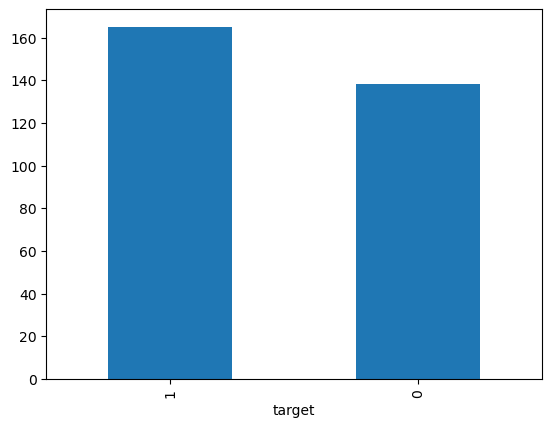

In [6]:
df.target.value_counts().plot(kind='bar')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# Are there any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Disease Frequency according to sex

In [10]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [11]:
# Compare target column with sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

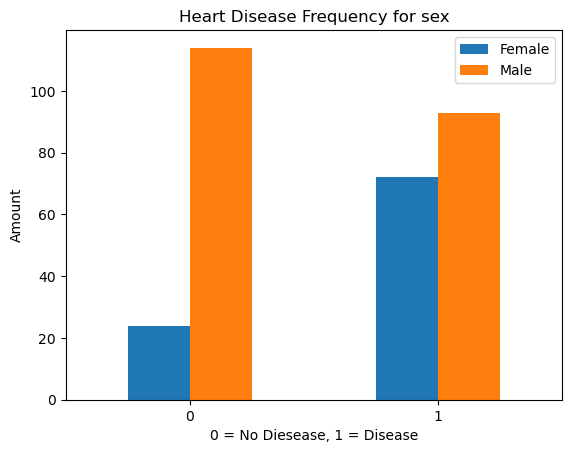

In [12]:
# Create a plot of crosstab
pd.crosstab(df.target,df.sex).plot(kind='bar')
plt.title("Heart Disease Frequency for sex")
plt.xlabel("0 = No Diesease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0)

In [13]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


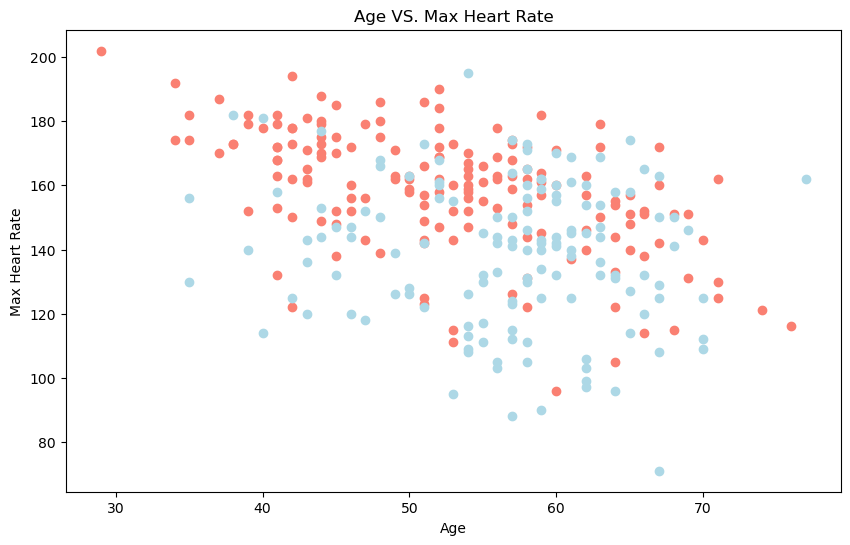

In [14]:
## Age vs. Max Heart Rate for Heart Disease
plt.figure(figsize=(10,6))
plt.title("Age VS. Max Heart Rate")

# Scatter with positive examples(1)
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c="salmon")

# Scatter with negative example(0)
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c="lightblue")

plt.xlabel("Age")
plt.ylabel("Max Heart Rate")

plt.show()

<Axes: ylabel='Frequency'>

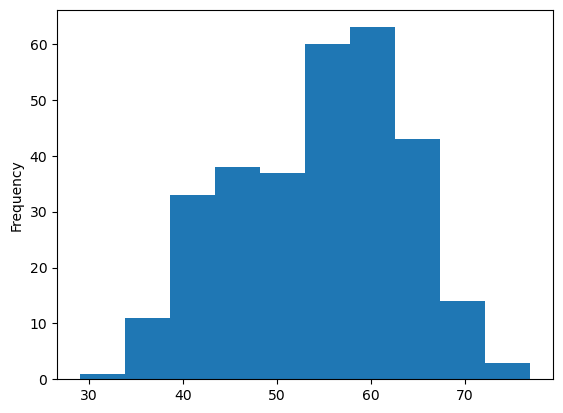

In [15]:
# Check the distribution of the age columns with a histogram
df.age.plot.hist()

### Heart Disearse Frequency per Chest Pain Type

In [16]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


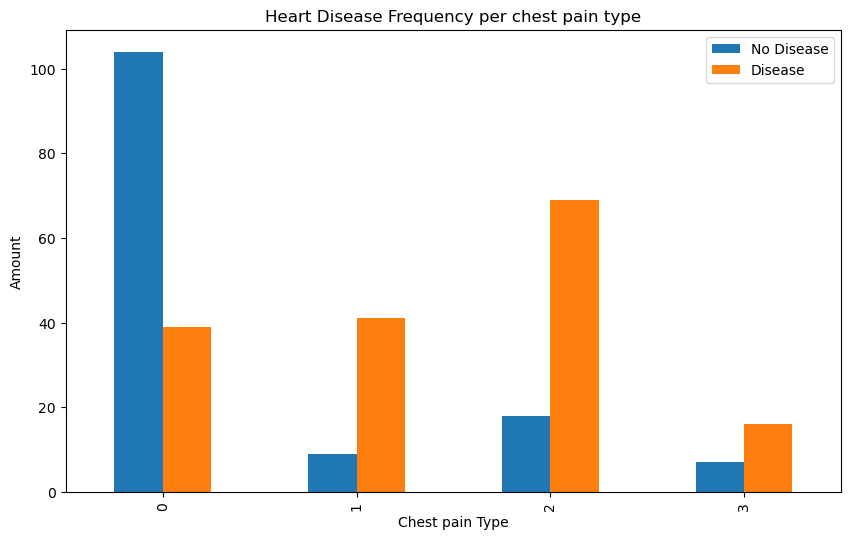

In [17]:
# Make the crosstab more visual

pd.crosstab(df.cp,df.target).plot(kind='bar',figsize=(10,6))

plt.title("Heart Disease Frequency per chest pain type")
plt.xlabel("Chest pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])
plt.show()

In [18]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


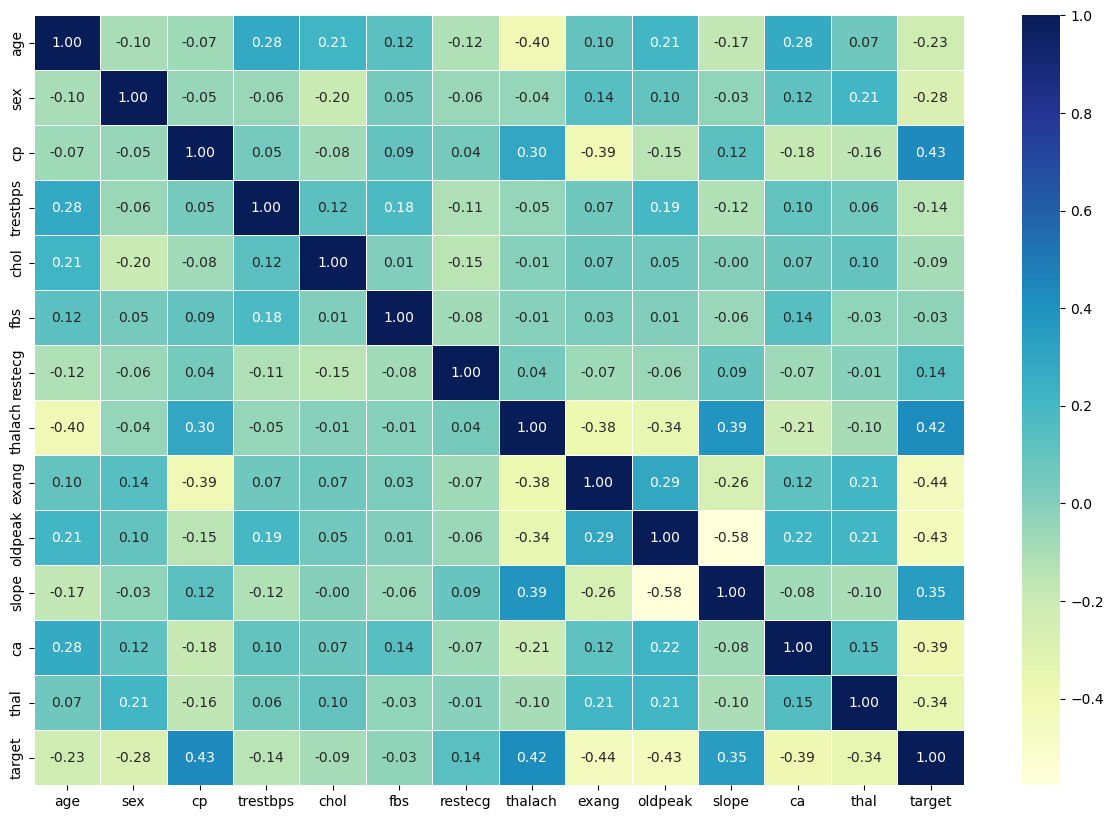

In [19]:
# Let's make our correaltion matrix a little prettier

corr_matrix = df.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu")

## 5. Modeling

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
# Split data into x and y
x = df.drop("target",axis=1)
y = df["target"]

In [22]:
x


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [23]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [24]:
# Split data into train and test sets

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [25]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3
26,59,1,2,150,212,1,1,157,0,1.6,2,0,2
255,45,1,0,142,309,0,0,147,1,0.0,1,3,3
183,58,1,2,112,230,0,0,165,0,2.5,1,1,3
290,61,1,0,148,203,0,1,161,0,0.0,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,61,1,0,140,207,0,0,138,1,1.9,2,1,3
21,44,1,2,130,233,0,1,179,1,0.4,2,0,2
187,54,1,0,124,266,0,0,109,1,2.2,1,1,3
54,63,0,2,135,252,0,0,172,0,0.0,2,0,2


In [26]:
y_train


289    0
26     1
255    0
183    0
290    0
      ..
284    0
21     1
187    0
54     1
195    0
Name: target, Length: 242, dtype: int64

Now it's time train model based on train set data.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set

We're going to try 3 different machinge learning model:
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [27]:
# put models in a dictionary

models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models,x_train,x_test,y_train,y_test):
    
    # set random seed
    np.random.seed(42)
    # Make a dictionary to keep model score
    model_scores = {}
    
    # Loop throught models
    for name, model in models.items():
        # Fit the model to data
        model.fit(x_train,y_train)
        # Evaluate the model and append it's score to model score
        model_scores[name] = model.score(x_test,y_test)
        
    return model_scores

In [28]:
model_scores = fit_and_score(models=models,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)

model_scores

C:\Users\ROOT\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.819672131147541,
 'KNN': 0.6065573770491803,
 'Random Forest': 0.8032786885245902}

### Model Comarison

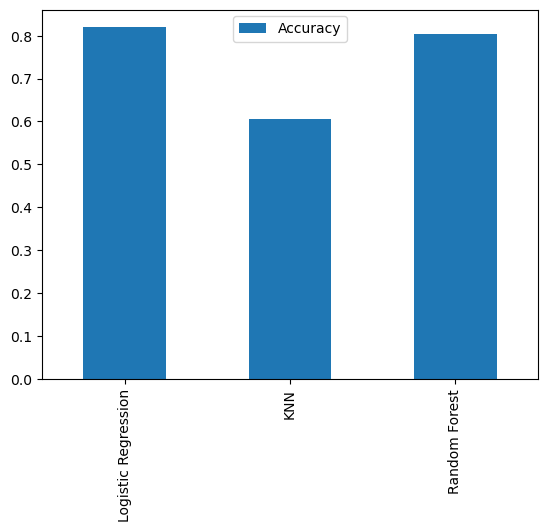

In [29]:
model_compare = pd.DataFrame(model_scores,index=["Accuracy"])

model_compare.T.plot.bar();

We found baseline model result.

Let's look at the following:

* Hyperparameter tuning
* Feature Importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 Score
* Classification report
* ROC curve
* Area under the curve (AUC)


### Hyperparameter tuning (by hand)


In [30]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1,21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    knn.fit(x_train,y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(x_train,y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(x_test,y_test))

In [31]:
train_scores



[1.0,
 0.8099173553719008,
 0.7933884297520661,
 0.7892561983471075,
 0.768595041322314,
 0.7768595041322314,
 0.7851239669421488,
 0.7479338842975206,
 0.7355371900826446,
 0.731404958677686,
 0.7148760330578512,
 0.7231404958677686,
 0.7231404958677686,
 0.71900826446281,
 0.7231404958677686,
 0.7272727272727273,
 0.7231404958677686,
 0.7355371900826446,
 0.731404958677686,
 0.7396694214876033]

In [32]:
test_scores

[0.6065573770491803,
 0.5409836065573771,
 0.6065573770491803,
 0.5245901639344263,
 0.6065573770491803,
 0.6065573770491803,
 0.5901639344262295,
 0.5245901639344263,
 0.5245901639344263,
 0.5245901639344263,
 0.5573770491803278,
 0.5573770491803278,
 0.5573770491803278,
 0.5409836065573771,
 0.5409836065573771,
 0.5573770491803278,
 0.5901639344262295,
 0.5573770491803278,
 0.5573770491803278,
 0.5409836065573771]

Max KNN score on test data 60.66%


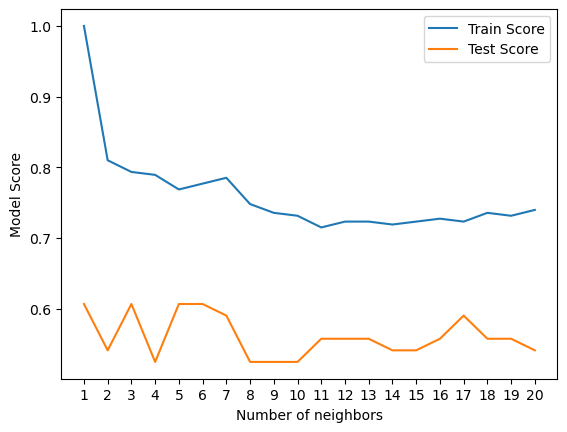

In [33]:
plt.plot(neighbors,train_scores,label="Train Score")
plt.plot(neighbors,test_scores,label="Test Score")
plt.xlabel('Number of neighbors')
plt.ylabel("Model Score")
plt.legend()
plt.xticks(np.arange(1,21,1))
print(f"Max KNN score on test data {max(test_scores)*100:.2f}%")
plt.show()

## Hyperparameter tuning with RandomizedSearchCV

We're going to tune:
* Logistic Regression()
* RandomForestClassifier()

... using RandomizedSearchCV


In [34]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4,4,20),
               "solver":["liblinear"]}

# Create a hyperparameter grid for RandomForest Classifier
rf_grid = {"n_estimators" : np.arange(10,1000,50),
          "max_depth" : [None,3,5,10],
          "min_samples_split" : np.arange(2,20,2),
          "min_samples_leaf" : np.arange(1,20,2)}

In [35]:
# Let's Tune using RamdomizedSearchCV
# Tune logistic Regression

np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5, # cress-validation
                               n_iter=20,
                               verbose=True)

# Fit random hyperparameter search model for logistic regression
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [36]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [37]:
rs_log_reg.score(x_test,y_test)

0.819672131147541

In [38]:
# Tune Random Forest Classifier

np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          n_iter=20,
                          cv=5,
                          verbose=True)

rs_rf.fit(x_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [39]:
rs_rf.best_params_

{'n_estimators': 460,
 'min_samples_split': 6,
 'min_samples_leaf': 9,
 'max_depth': None}

In [40]:
# Evaluate the RandomForestClassifier after tuning
rs_rf.score(x_test,y_test)

0.7868852459016393

1. By hand
2. RandomizedSearchCV
3. GridSearchCV

## Hyperparameter tuning with GridSearchCV


In [41]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4,4,30),
               "solver":["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

gs_log_reg.fit(x_train,y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [42]:
gs_log_reg.best_params_

{'C': 0.7278953843983146, 'solver': 'liblinear'}

In [43]:
gs_log_reg.score(x_test,y_test)

0.819672131147541

## Evaluting our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC Score
* Confusion Matrix
* Classification Report
* Precision
* Recall
* F1-Score
* Cross Validation if possiable


In [45]:
# Make prediction with tuned model

y_preds = gs_log_reg.predict(x_test)

In [46]:
y_preds

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0], dtype=int64)

In [48]:
y_test

78     1
167    0
271    0
250    0
285    0
      ..
137    1
277    0
251    0
155    1
301    0
Name: target, Length: 61, dtype: int64

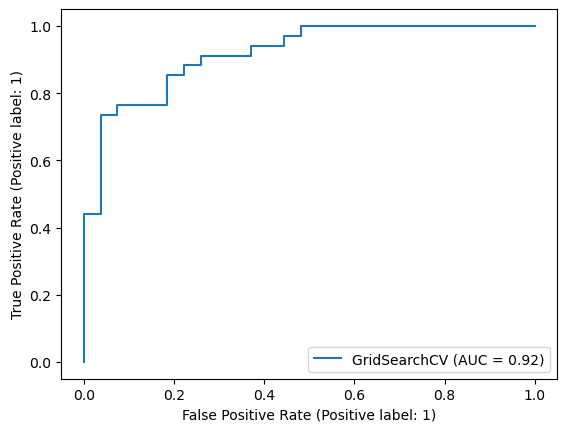

In [50]:
# Plot ROC curve and AUC matric
RocCurveDisplay.from_estimator(gs_log_reg,x_test,y_test)

In [51]:
# Confusion matrix
print(confusion_matrix(y_test,y_preds))

[[21  6]
 [ 5 29]]


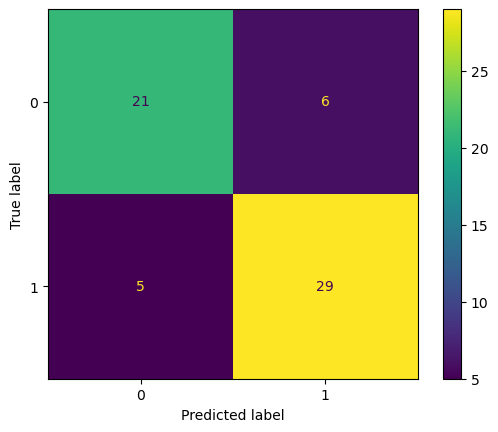

In [56]:
cm = confusion_matrix(y_test,y_preds)
dis = ConfusionMatrixDisplay(confusion_matrix=cm)
dis.plot()

In [57]:
# classification report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79        27
           1       0.83      0.85      0.84        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [58]:
# Cross Validation

gs_log_reg.best_params_

{'C': 0.7278953843983146, 'solver': 'liblinear'}

In [65]:
clf = LogisticRegression(C=0.7278953843983146,solver="liblinear")

In [67]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,x,y,cv=5,scoring='accuracy')
cv_acc.mean()

0.8182513661202186

In [68]:
# Cross-Validated Precision
cv_prec = cross_val_score(clf,x,y,cv=5,scoring='precision')
cv_prec.mean()

0.8138514802551555

In [69]:
# Cross-validated Recall
cv_recall = cross_val_score(clf,x,y,cv=5,scoring='recall')
cv_recall.mean()

0.8727272727272727

In [70]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,x,y,cv=5,scoring='f1')
cv_f1.mean()

0.8408267145594746

<Axes: title={'center': 'Cross-Validation Metrics'}>

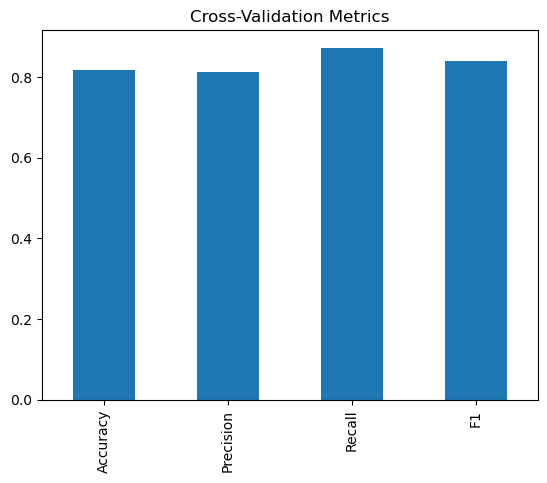

In [79]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy" : cv_acc.mean(),
                          "Precision" : cv_prec.mean(),
                          "Recall" : cv_recall.mean(),
                          "F1" : cv_f1.mean()},
                             index=[0])
cv_metrics.T.plot.bar(title="Cross-Validation Metrics",legend=False)

## Feature Importance

Feature importance is another as asking, "Which feature contributed most to the outcomes of the model and how did they contribute"

Finding feature importance is different for each ML model.

In [82]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Feature Importance for logictic regression

In [83]:
gs_log_reg.best_params_

{'C': 0.7278953843983146, 'solver': 'liblinear'}

In [85]:
clf = LogisticRegression(C=0.7278953843983146,solver="liblinear")
clf.fit(x_train,y_train)

LogisticRegression(C=0.7278953843983146, solver='liblinear')

In [86]:
# Check coef
clf.coef_

array([[ 0.00229883, -1.19629128,  0.79033148, -0.01053417, -0.00512223,
        -0.27606755,  0.22259797,  0.02868836, -0.76662271, -0.44829723,
         0.54695571, -0.81567718, -0.58723436]])

In [88]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.002298833921935455,
 'sex': -1.1962912836451058,
 'cp': 0.7903314820490543,
 'trestbps': -0.010534167556229811,
 'chol': -0.005122233051184705,
 'fbs': -0.27606755458120014,
 'restecg': 0.22259796528653195,
 'thalach': 0.02868836374234663,
 'exang': -0.7666227077255701,
 'oldpeak': -0.4482972270707123,
 'slope': 0.5469557128401618,
 'ca': -0.8156771788001117,
 'thal': -0.5872343648066255}

<Axes: title={'center': 'Feature Importance'}>

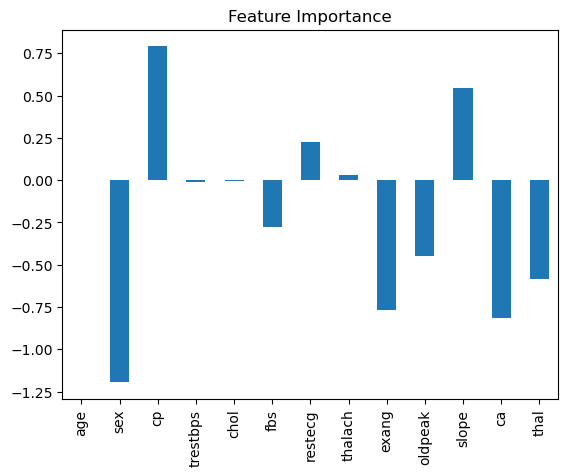

In [90]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend=False)